In [1]:
import mne
import os

# =============================================================================
# --- Configuration ---
# =============================================================================
# The original EDF file we are starting with.
EDF_FILE_PATH = './EPCTL19/EPCTL19.edf' 

# The name for our new, clean, preprocessed file.
# Using .fif is the MNE standard and is highly recommended.
OUTPUT_FIF_FILE = 'EPCTL19_preproc.fif'

# Define the exact list of channels we want to keep.
# This is the most important step. Double-check these names match the EDF file.
CHANNELS_TO_KEEP = [
    # EEG Channels
    'Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'C3', 'C4', 'O1', 'O2', 'T5', 'T6',
    # EOG Channels
    'EOG1', 'EOG2',
    # EMG Channel
    'ChEMG1',
    # ECG Channel
    'ECG1'
]

# Define the type for each channel. This is crucial for MNE's functions.
# We create a dictionary to map channel names to their types.
CHANNEL_TYPE_MAPPING = {
    'Fp1': 'eeg', 'Fp2': 'eeg', 'F3': 'eeg', 'F4': 'eeg', 
    'F7': 'eeg', 'F8': 'eeg', 'C3': 'eeg', 'C4': 'eeg', 
    'O1': 'eeg', 'O2': 'eeg', 'T5': 'eeg', 'T6': 'eeg',
    'EOG1': 'eog', 'EOG2': 'eog',
    'ChEMG1': 'emg',
    'ECG1': 'ecg'
}

# =============================================================================
# --- Main Execution ---
# =============================================================================
print(f"--- Starting: Creating a clean data file ---")

# --- 1. Load the original EDF file ---
# We only read the header first to be memory-safe.
print(f"Loading original file: {EDF_FILE_PATH}")
raw = mne.io.read_raw_edf(EDF_FILE_PATH, preload=False, verbose=False)
print(f"Original file contains {len(raw.ch_names)} channels.")

# --- 2. Select only the channels we want to keep ---
# The 'pick_channels' method is perfect for this. It creates a new raw
# object with only our desired channels.
print(f"Selecting {len(CHANNELS_TO_KEEP)} channels to keep...")
raw.pick_channels(CHANNELS_TO_KEEP)
print("Channels selected.")

# --- 3. Set the correct channel types ---
# This step is critical. We tell MNE what kind of signal each channel is.
print("Setting channel types (eeg, eog, ecg, emg)...")
raw.set_channel_types(CHANNEL_TYPE_MAPPING)
print("Channel types set successfully.")

# --- 4. Load the selected data into memory ---
# Now that we have a much smaller dataset, we can safely load it.
raw.load_data(verbose=False)

# --- 5. Save to a new, clean .fif file ---
# The overwrite=True argument will replace the file if it already exists,
# which is useful for re-running the script.
print(f"Saving the clean data to: {OUTPUT_FIF_FILE}")
raw.save(OUTPUT_FIF_FILE, overwrite=True)

print("\n--- Success! ---")
print(f"A new file '{OUTPUT_FIF_FILE}' has been created.")
print("This file contains only the selected channels with their correct types.")
print("We will use this new file for all future processing steps.")

# Optional: You can print the info of the new raw object to verify
print("\n--- Info of the new, clean data ---")
print(raw.info)

--- Starting: Creating a clean data file ---
Loading original file: ./EPCTL19/EPCTL19.edf
Original file contains 93 channels.
Selecting 16 channels to keep...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Channels selected.
Setting channel types (eeg, eog, ecg, emg)...
Channel types set successfully.
Saving the clean data to: EPCTL19_preproc.fif
Writing c:\Users\reddy\Desktop\REM_mega\Data\EPCTL19_preproc.fif


C:\Users\reddy\AppData\Local\Temp\ipykernel_26364\1069197671.py:70: RuntimeWarning: This filename (c:\Users\reddy\Desktop\REM_mega\Data\EPCTL19_preproc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(OUTPUT_FIF_FILE, overwrite=True)


Closing c:\Users\reddy\Desktop\REM_mega\Data\EPCTL19_preproc.fif
[done]

--- Success! ---
A new file 'EPCTL19_preproc.fif' has been created.
This file contains only the selected channels with their correct types.
We will use this new file for all future processing steps.

--- Info of the new, clean data ---
<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, F7, F8, C3, C4, O1, O2, T5, T6, EOG1, EOG2, ...
 chs: 12 EEG, 2 EOG, 1 EMG, 1 ECG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: 2023-12-21 08:51:22 UTC
 nchan: 16
 projs: []
 sfreq: 1000.0 Hz
 subject_info: <subject_info | his_id: X, sex: 0, last_name: X>
>


--- Starting Deep Inspection of: EPCTL19_preproc.fif ---
Note: The 'RuntimeWarning' about naming conventions is normal and can be ignored.


C:\Users\reddy\AppData\Local\Temp\ipykernel_2696\1596120066.py:41: RuntimeWarning: This filename (EPCTL19_preproc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(FIF_FILE_PATH, preload=True, verbose=False)


File loaded successfully.

--- [A] CORE FILE METADATA ---
<Info | 10 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, F7, F8, C3, C4, O1, O2, T5, T6, EOG1, EOG2, ...
 chs: 12 EEG, 2 EOG, 1 EMG, 1 ECG
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: 2023-12-21 08:51:22 UTC
 meas_id: 4 items (dict)
 nchan: 16
 projs: []
 sfreq: 1000.0 Hz
 subject_info: <subject_info | his_id: X, last_name: X, sex: 0>
>

--- [B] DETAILED CHANNEL MANIFEST ---
Index  Name      Type   
------------------------
0      Fp1       eeg    
1      Fp2       eeg    
2      F3        eeg    
3      F4        eeg    
4      F7        eeg    
5      F8        eeg    
6      C3        eeg    
7      C4        eeg    
8      O1        eeg    
9      O2        eeg    
10     T5        eeg    
11     T6        eeg    
12     EOG1      eog    
13     EOG2      eog    
14     ChEMG1    emg    
15     ECG1      ecg    
------------------------

Verification: Confirme

C:\Users\reddy\AppData\Local\Temp\ipykernel_2696\1596120066.py:31: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


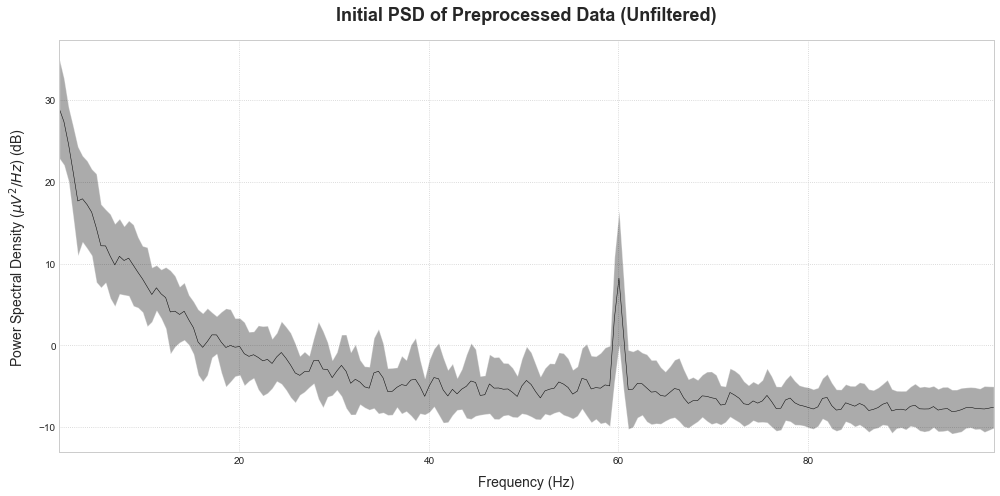


--- [D] INTERACTIVE SIGNAL PLOT ---
Now displaying the interactive plot of all signals.
INSTRUCTIONS:
 - A new window will open.
 - SCROLL with your mouse wheel or trackpad to move through time.
 - Look at the EOG channels for large spikes (eye blinks).
 - Look at the ECG channel for the regular QRS complex (heartbeat).
 - CLOSE the plot window when you are finished inspecting.
Using matplotlib as 2D backend.


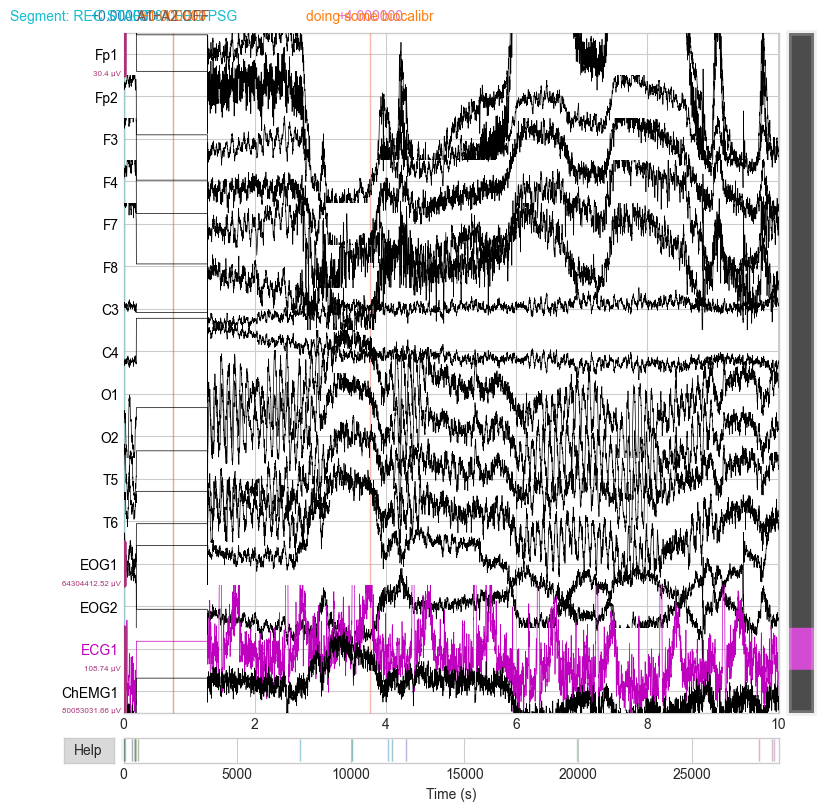


--- Deep Inspection Complete ---
The file is valid and contains the correct data. We are ready for filtering.


In [1]:
import mne
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# =============================================================================
# --- Configuration ---
# =============================================================================
# The clean file we created in the previous step.
FIF_FILE_PATH = 'EPCTL19_preproc.fif'

# =============================================================================
# --- Helper Function: PSD Plot for Inspection ---
# =============================================================================
def plot_inspection_psd(raw, title):
    """
    A dedicated function to plot the PSD for initial data inspection.
    """
    print("\n--- Generating Power Spectral Density (PSD) plot ---")
    sns.set_style("whitegrid")
    plt.style.use('seaborn-v0_8-whitegrid')
    
    fig = raw.plot_psd(fmin=0.5, fmax=100.0, average=True, spatial_colors=False, show=False)
    
    ax = fig.axes[0]
    fig.set_size_inches(14, 7)
    ax.set_title(title, fontsize=18, weight='bold', pad=20)
    ax.set_xlabel("Frequency (Hz)", fontsize=14, labelpad=10)
    ax.set_ylabel(r'Power Spectral Density ($\mu V^2/Hz$) (dB)', fontsize=14, labelpad=10)
    
    plt.tight_layout()
    plt.show()

# =============================================================================
# --- Main Inspection Script ---
# =============================================================================
print(f"--- Starting Deep Inspection of: {FIF_FILE_PATH} ---")
print("Note: The 'RuntimeWarning' about naming conventions is normal and can be ignored.")

# --- 1. Load the preprocessed .fif file ---
raw = mne.io.read_raw_fif(FIF_FILE_PATH, preload=True, verbose=False)
print("File loaded successfully.")

# --- 2. High-Level Summary (The "Info" Object) ---
print("\n" + "="*40)
print("--- [A] CORE FILE METADATA ---")
print("="*40)
print(raw.info)

# --- 3. Detailed Channel Manifest ---
print("\n" + "="*40)
print("--- [B] DETAILED CHANNEL MANIFEST ---")
print("="*40)
# **FIX:** This section is now simplified and more robust. It no longer tries
# to look up unit strings, which was causing the crash. It focuses on the
# essential information: the channel name and its assigned type.
print(f"{'Index':<7}{'Name':<10}{'Type':<7}")
print("-"*24)
for i, ch_name in enumerate(raw.ch_names):
    ch_type = mne.channel_type(raw.info, i)
    print(f"{i:<7}{ch_name:<10}{ch_type:<7}")
print("-"*24)
print("\nVerification: Confirmed all channels are present with correct types.")

# --- 4. Frequency Content Inspection (PSD Plot) ---
print("\n" + "="*40)
print("--- [C] FREQUENCY CONTENT SNAPSHOT ---")
print("="*40)
plot_inspection_psd(raw, title="Initial PSD of Preprocessed Data (Unfiltered)")


# --- 5. Visual Signal Inspection (The "Proof of Life") ---
print("\n" + "="*40)
print("--- [D] INTERACTIVE SIGNAL PLOT ---")
print("="*40)
print("Now displaying the interactive plot of all signals.")
print("INSTRUCTIONS:")
print(" - A new window will open.")
print(" - SCROLL with your mouse wheel or trackpad to move through time.")
print(" - Look at the EOG channels for large spikes (eye blinks).")
print(" - Look at the ECG channel for the regular QRS complex (heartbeat).")
print(" - CLOSE the plot window when you are finished inspecting.")

raw.plot(
    duration=10,
    n_channels=len(raw.ch_names),
    scalings='auto',
    block=True
)

print("\n--- Deep Inspection Complete ---")
print("The file is valid and contains the correct data. We are ready for filtering.")



--- Step 2: Applying Notch Filter ---


C:\Users\reddy\AppData\Local\Temp\ipykernel_4488\4112821108.py:77: RuntimeWarning: This filename (EPCTL19_preproc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(FIF_FILE_PATH, preload=True, verbose=False)


Loaded clean file: EPCTL19_preproc.fif
Created a copy of the data for 'before' comparison.
Applying 60.0 Hz notch filter to all channels...
Notch filter applied successfully.
--- Generating comparison plot for EEG channels ---
Effective window size : 2.048 (s)
Effective window size : 2.048 (s)


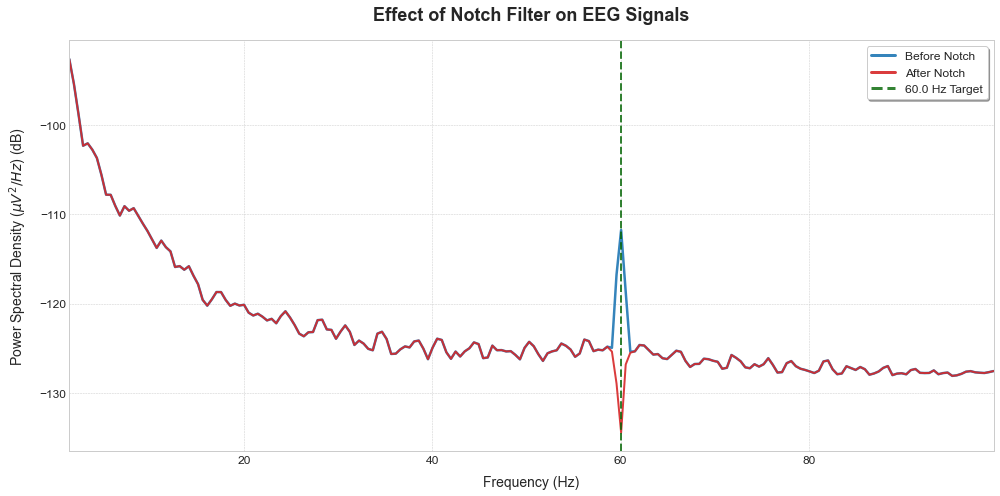

--- Generating comparison plot for EOG channels ---
Effective window size : 2.048 (s)
Effective window size : 2.048 (s)


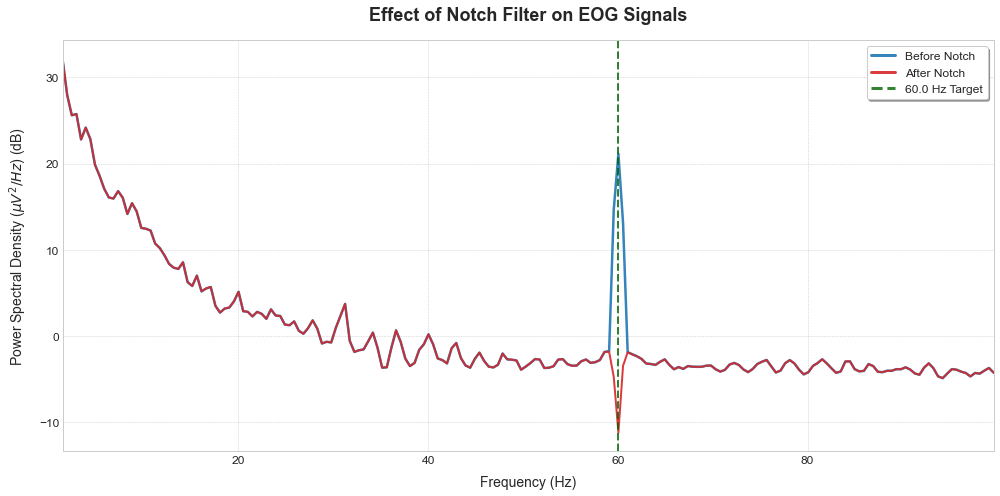

--- Generating comparison plot for ECG channels ---
Effective window size : 2.048 (s)
Effective window size : 2.048 (s)


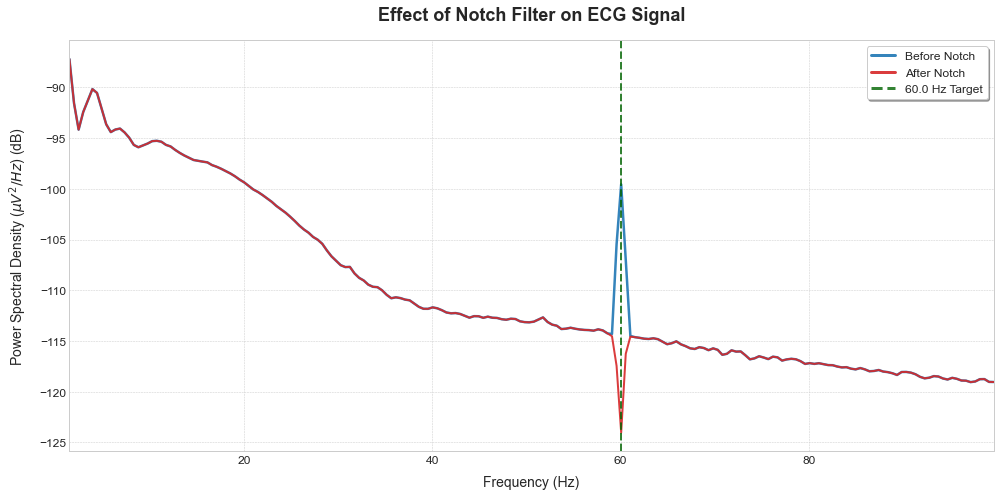

--- Generating comparison plot for EMG channels ---
Effective window size : 2.048 (s)
Effective window size : 2.048 (s)


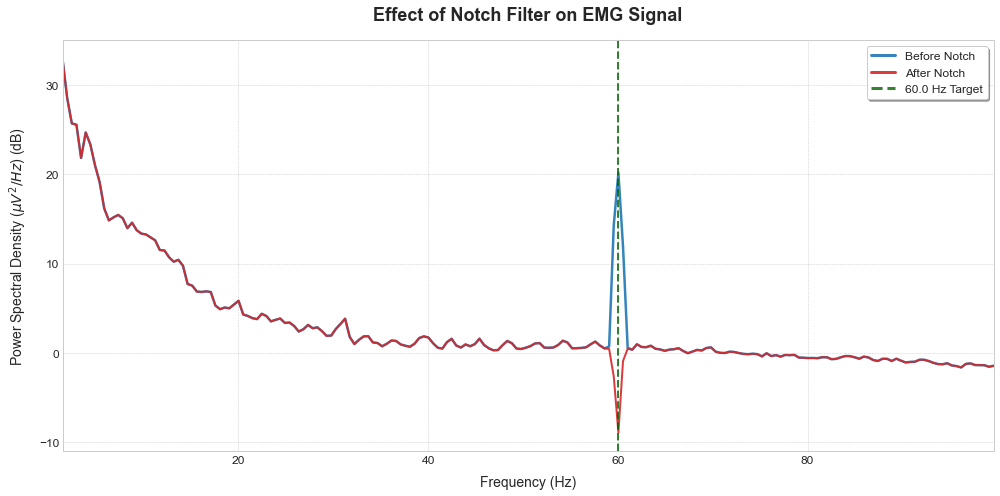


--- Notch Filtering Complete ---
Saving notch-filtered data to: EPCTL27_notched.fif
Writing c:\Users\reddy\Desktop\REM_mega\Data\EPCTL27_notched.fif


C:\Users\reddy\AppData\Local\Temp\ipykernel_4488\4112821108.py:112: RuntimeWarning: This filename (c:\Users\reddy\Desktop\REM_mega\Data\EPCTL27_notched.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(NOTCHED_FILE_PATH, overwrite=True)


Closing c:\Users\reddy\Desktop\REM_mega\Data\EPCTL27_notched.fif
[done]
File saved.


In [ ]:
import mne
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# =============================================================================
# --- Configuration ---
# =============================================================================
FIF_FILE_PATH = 'EPCTL19_preproc.fif'
NOTCH_FREQ = 60.0

# =============================================================================
# --- Helper Function: Plot Notch Filter Effect ---
# =============================================================================
def plot_notch_filter_effect(raw_before, raw_after, picks, title):
    """
    Creates a comparison plot showing the PSD before and after notch filtering.

    Args:
        raw_before (mne.io.Raw): The raw data before filtering.
        raw_after (mne.io.Raw): The raw data after filtering.
        picks (str): The channel type to plot (e.g., 'eeg', 'eog').
        title (str): The title for the plot.
    """
    print(f"--- Generating comparison plot for {picks.upper()} channels ---")
    sns.set_style("whitegrid")
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(14, 7))

    try:
        # --- Plot "Before" PSD ---
        spectrum_before = raw_before.compute_psd(picks=picks, fmin=1.0, fmax=100.0)
        # **THE FIX:** Be explicit. Tell get_data() which picks to use.
        psds_before, freqs = spectrum_before.get_data(picks=picks, return_freqs=True)
        psds_before_db = 10 * np.log10(psds_before)
        mean_psd_before = np.mean(psds_before_db, axis=0)
        ax.plot(freqs, mean_psd_before, color='#1f77b4', lw=2.5, alpha=0.9, label='Before Notch')

        # --- Plot "After" PSD ---
        spectrum_after = raw_after.compute_psd(picks=picks, fmin=1.0, fmax=100.0)
        # **THE FIX:** Be explicit here as well.
        psds_after, _ = spectrum_after.get_data(picks=picks, return_freqs=True)
        psds_after_db = 10 * np.log10(psds_after)
        mean_psd_after = np.mean(psds_after_db, axis=0)
        ax.plot(freqs, mean_psd_after, color='#d62728', lw=2, alpha=0.9, label='After Notch')

        # --- Beautify the Plot ---
        ax.set_title(title, fontsize=18, weight='bold', pad=20)
        ax.set_xlabel("Frequency (Hz)", fontsize=14, labelpad=10)
        ax.set_ylabel(r'Power Spectral Density ($\mu V^2/Hz$) (dB)', fontsize=14, labelpad=10)
        ax.set_xlim([freqs.min(), freqs.max()])
        
        ax.axvline(NOTCH_FREQ, color='darkgreen', linestyle='--', lw=2, alpha=0.8, label=f'{NOTCH_FREQ} Hz Target')

        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax.tick_params(axis='both', which='major', labelsize=12)
        
        leg = ax.legend(loc='upper right', fontsize=12, frameon=True, shadow=True)
        for line in leg.get_lines():
            line.set_linewidth(3)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"\n--- ERROR generating plot for '{picks}' channels ---")
        print(f"An unexpected error occurred: {e}")
        print("This may happen if the file contains no channels of the specified type.\n")


# =============================================================================
# --- Main Execution ---
# =============================================================================
print("--- Step 2: Applying Notch Filter ---")

# --- 1. Load the preprocessed .fif file ---
raw = mne.io.read_raw_fif(FIF_FILE_PATH, preload=True, verbose=False)
print(f"Loaded clean file: {FIF_FILE_PATH}")

# --- 2. Create a copy for comparison ---
raw_before_notch = raw.copy()
print("Created a copy of the data for 'before' comparison.")

# --- 3. Apply the Notch Filter ---
print(f"Applying {NOTCH_FREQ} Hz notch filter to all channels...")
raw.notch_filter(freqs=NOTCH_FREQ, picks=['eeg', 'eog', 'emg', 'ecg'], verbose=False)
print("Notch filter applied successfully.")

# --- 4. Visualize the Effect for Each Channel Type ---
plot_notch_filter_effect(
    raw_before_notch, raw, picks='eeg', 
    title="Effect of Notch Filter on EEG Signals"
)
plot_notch_filter_effect(
    raw_before_notch, raw, picks='eog', 
    title="Effect of Notch Filter on EOG Signals"
)
plot_notch_filter_effect(
    raw_before_notch, raw, picks='ecg', 
    title="Effect of Notch Filter on ECG Signal"
)
plot_notch_filter_effect(
    raw_before_notch, raw, picks='emg', 
    title="Effect of Notch Filter on EMG Signal"
)

print("\n--- Notch Filtering Complete ---")

# --- 5. Save the notched data ---
NOTCHED_FILE_PATH = 'EPCTL19_notched.fif'
print(f"Saving notch-filtered data to: {NOTCHED_FILE_PATH}")
raw.save(NOTCHED_FILE_PATH, overwrite=True)
print("File saved.")

--- Step 3: Applying Band-Pass Filters ---


C:\Users\reddy\AppData\Local\Temp\ipykernel_22460\1613144264.py:84: RuntimeWarning: This filename (EPCTL27_notched.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(NOTCHED_FILE_PATH, preload=True, verbose=False)


Loaded notch-filtered file: EPCTL27_notched.fif
Created a copy of the data for 'before' comparison.
Applying band-pass filters to each channel type...
Band-pass filters applied successfully.
--- Generating comparison plot for EEG channels ---
Effective window size : 2.048 (s)
Effective window size : 2.048 (s)


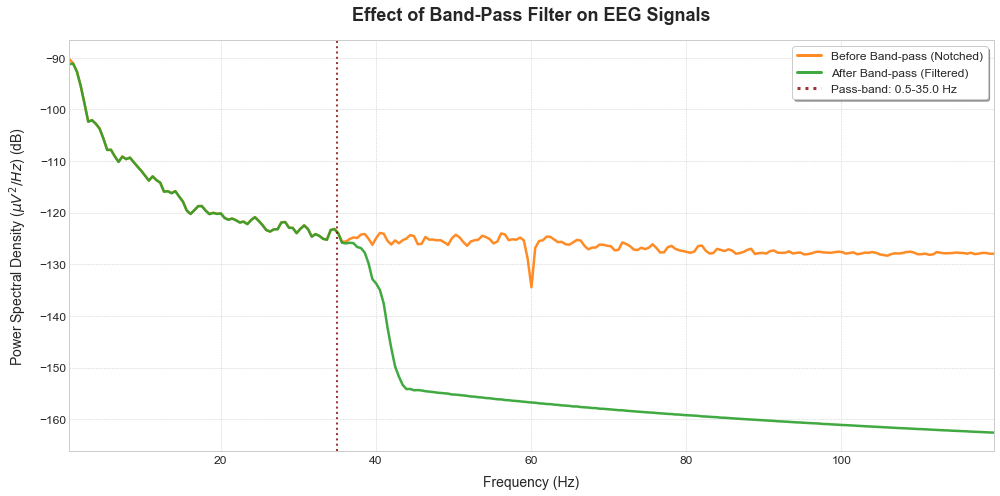

--- Generating comparison plot for EOG channels ---
Effective window size : 2.048 (s)
Effective window size : 2.048 (s)


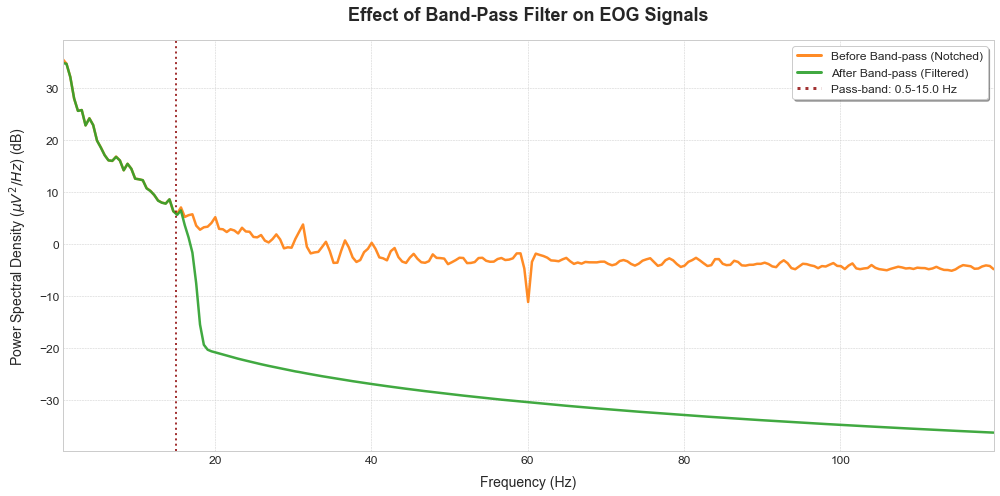

--- Generating comparison plot for ECG channels ---
Effective window size : 2.048 (s)
Effective window size : 2.048 (s)


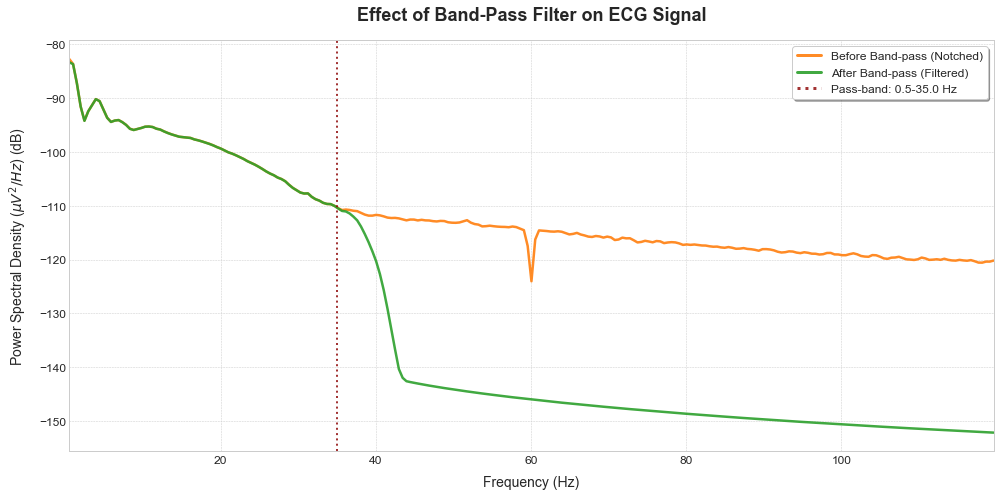

--- Generating comparison plot for EMG channels ---
Effective window size : 2.048 (s)
Effective window size : 2.048 (s)


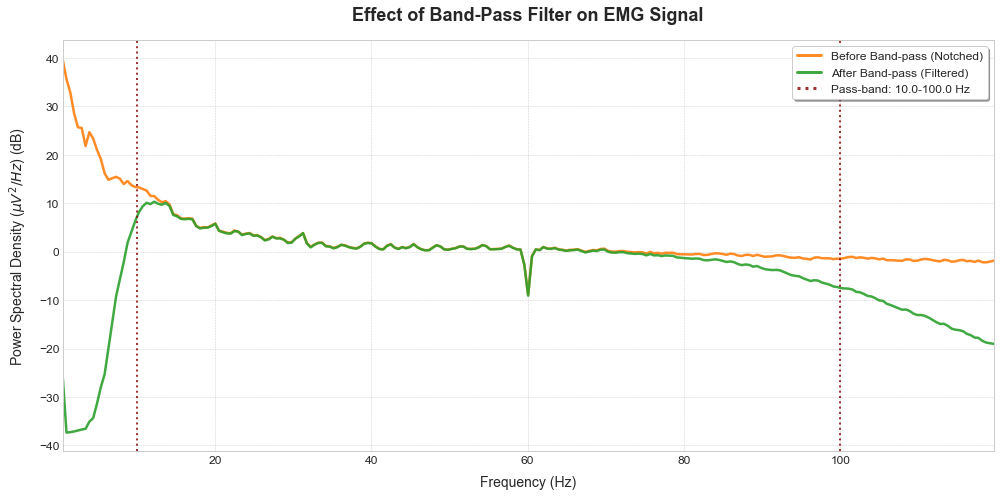


--- Band-Pass Filtering Complete ---
Saving fully filtered data to: EPCTL19_filtered.fif
Writing c:\Users\reddy\Desktop\REM_mega\Data\EPCTL19_filtered.fif


C:\Users\reddy\AppData\Local\Temp\ipykernel_22460\1613144264.py:121: RuntimeWarning: This filename (c:\Users\reddy\Desktop\REM_mega\Data\EPCTL19_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(FILTERED_FILE_PATH, overwrite=True)


Closing c:\Users\reddy\Desktop\REM_mega\Data\EPCTL19_filtered.fif
[done]
File saved. This file is now ready for ICA.


In [1]:
import mne
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# =============================================================================
# --- Configuration ---
# =============================================================================
# The notch-filtered file we created in the last step.
NOTCHED_FILE_PATH = 'EPCTL27_notched.fif'
# The new file we will create in this step.
FILTERED_FILE_PATH = 'EPCTL19_filtered.fif'

# Band-pass filter settings tailored for sleep analysis
EEG_BANDPASS = [0.5, 35.0]
EOG_BANDPASS = [0.5, 15.0]
ECG_BANDPASS = [0.5, 35.0]
EMG_BANDPASS = [10.0, 100.0]

# =============================================================================
# --- Helper Function: Plot Band-Pass Filter Effect ---
# =============================================================================
def plot_bandpass_filter_effect(raw_before, raw_after, picks, title, bandpass_freqs):
    """
    Creates a comparison plot showing the PSD before and after band-pass filtering.

    Args:
        raw_before (mne.io.Raw): Data before band-pass (i.e., just notched).
        raw_after (mne.io.Raw): Data after band-pass filtering.
        picks (str): The channel type to plot ('eeg', 'eog', etc.).
        title (str): The title for the plot.
        bandpass_freqs (list): A list with [l_freq, h_freq] for visualization.
    """
    print(f"--- Generating comparison plot for {picks.upper()} channels ---")
    sns.set_style("whitegrid")
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(14, 7))

    try:
        # --- Plot "Before" (Notched) PSD ---
        spectrum_before = raw_before.compute_psd(picks=picks, fmin=0.1, fmax=120.0)
        psds_before, freqs = spectrum_before.get_data(picks=picks, return_freqs=True)
        psds_before_db = 10 * np.log10(psds_before)
        mean_psd_before = np.mean(psds_before_db, axis=0)
        ax.plot(freqs, mean_psd_before, color='#ff7f0e', lw=2.5, alpha=0.9, label='Before Band-pass (Notched)')

        # --- Plot "After" (Fully Filtered) PSD ---
        spectrum_after = raw_after.compute_psd(picks=picks, fmin=0.1, fmax=120.0)
        psds_after, _ = spectrum_after.get_data(picks=picks, return_freqs=True)
        psds_after_db = 10 * np.log10(psds_after)
        mean_psd_after = np.mean(psds_after_db, axis=0)
        ax.plot(freqs, mean_psd_after, color='#2ca02c', lw=2.5, alpha=0.9, label='After Band-pass (Filtered)')

        # --- Beautify the Plot ---
        ax.set_title(title, fontsize=18, weight='bold', pad=20)
        ax.set_xlabel("Frequency (Hz)", fontsize=14, labelpad=10)
        ax.set_ylabel(r'Power Spectral Density ($\mu V^2/Hz$) (dB)', fontsize=14, labelpad=10)
        ax.set_xlim([freqs.min(), freqs.max()])
        
        # Add vertical lines to show the pass-band
        l_freq, h_freq = bandpass_freqs
        ax.axvline(l_freq, color='darkred', linestyle=':', lw=2, alpha=0.8, label=f'Pass-band: {l_freq}-{h_freq} Hz')
        ax.axvline(h_freq, color='darkred', linestyle=':', lw=2, alpha=0.8)

        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax.tick_params(axis='both', which='major', labelsize=12)
        
        leg = ax.legend(loc='upper right', fontsize=12, frameon=True, shadow=True)
        for line in leg.get_lines():
            line.set_linewidth(3)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"\n--- ERROR generating plot for '{picks}' channels: {e} ---\n")

# =============================================================================
# --- Main Execution ---
# =============================================================================
print("--- Step 3: Applying Band-Pass Filters ---")

# --- 1. Load the notch-filtered .fif file ---
raw = mne.io.read_raw_fif(NOTCHED_FILE_PATH, preload=True, verbose=False)
print(f"Loaded notch-filtered file: {NOTCHED_FILE_PATH}")

# --- 2. Create a copy for comparison ---
raw_before_bandpass = raw.copy()
print("Created a copy of the data for 'before' comparison.")

# --- 3. Apply the Band-Pass Filters ---
print("Applying band-pass filters to each channel type...")
raw.filter(l_freq=EEG_BANDPASS[0], h_freq=EEG_BANDPASS[1], picks='eeg', verbose=False)
raw.filter(l_freq=EOG_BANDPASS[0], h_freq=EOG_BANDPASS[1], picks='eog', verbose=False)
raw.filter(l_freq=ECG_BANDPASS[0], h_freq=ECG_BANDPASS[1], picks='ecg', verbose=False)
raw.filter(l_freq=EMG_BANDPASS[0], h_freq=EMG_BANDPASS[1], picks='emg', method='iir', verbose=False)
print("Band-pass filters applied successfully.")

# --- 4. Visualize the Effect for Each Channel Type ---
plot_bandpass_filter_effect(
    raw_before_bandpass, raw, picks='eeg', 
    title="Effect of Band-Pass Filter on EEG Signals", bandpass_freqs=EEG_BANDPASS
)
plot_bandpass_filter_effect(
    raw_before_bandpass, raw, picks='eog', 
    title="Effect of Band-Pass Filter on EOG Signals", bandpass_freqs=EOG_BANDPASS
)
plot_bandpass_filter_effect(
    raw_before_bandpass, raw, picks='ecg', 
    title="Effect of Band-Pass Filter on ECG Signal", bandpass_freqs=ECG_BANDPASS
)
plot_bandpass_filter_effect(
    raw_before_bandpass, raw, picks='emg', 
    title="Effect of Band-Pass Filter on EMG Signal", bandpass_freqs=EMG_BANDPASS
)

print("\n--- Band-Pass Filtering Complete ---")

# --- 5. Save the fully filtered data ---
print(f"Saving fully filtered data to: {FILTERED_FILE_PATH}")
raw.save(FILTERED_FILE_PATH, overwrite=True)
print("File saved. This file is now ready for ICA.")


In [1]:
import mne
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# =============================================================================
# --- Configuration ---
# =============================================================================
FILTERED_FILE_PATH = 'EPCTL19_filtered.fif'
CLEANED_FILE_PATH = 'EPCTL19_cleaned.fif'
NEW_SFREQ = 250.0

# =============================================================================
# --- Main Execution ---
# =============================================================================
print("--- Step 4: Artifact Removal with Linear Regression (New Method) ---")

# --- 1. Load and Resample Data ---
raw = mne.io.read_raw_fif(FILTERED_FILE_PATH, preload=True, verbose=False)
print(f"Loaded file: {FILTERED_FILE_PATH} (sfreq={raw.info['sfreq']} Hz)")
raw.resample(NEW_SFREQ, verbose=False)
print(f"Resampling complete. New sfreq = {raw.info['sfreq']} Hz")

# --- 2. Prepare Data for Regression ---
# Get the data for our artifact "regressors" (EOG and ECG)
eog_data = raw.get_data(picks='eog')
ecg_data = raw.get_data(picks='ecg')

# Combine them into a single array of noise sources.
# We transpose it to have shape (n_samples, n_noise_channels)
noise_sources = np.vstack([eog_data, ecg_data]).T

# Get the EEG data that we want to clean
eeg_data = raw.get_data(picks='eeg')
eeg_info = mne.pick_info(raw.info, mne.pick_types(raw.info, eeg=True, exclude='bads'))
eeg_channel_names = eeg_info['ch_names']

# --- 3. Clean Each EEG Channel Iteratively ---
print("\nCleaning EEG channels using linear regression...")
cleaned_eeg_data = np.zeros_like(eeg_data)

for i in range(len(eeg_channel_names)):
    # The current EEG channel is our target signal 'y'
    target_eeg_signal = eeg_data[i, :].T
    
    # Fit the linear regression model
    # model: target_eeg = B1*EOG1 + B2*EOG2 + B3*ECG1 + ...
    model = LinearRegression()
    model.fit(noise_sources, target_eeg_signal)
    
    # Predict the artifact component present in the EEG channel
    predicted_artifact = model.predict(noise_sources)
    
    # Subtract the artifact to get the clean signal
    # clean_signal = original_signal - predicted_artifact
    clean_signal = target_eeg_signal - predicted_artifact
    
    cleaned_eeg_data[i, :] = clean_signal
    print(f"  - Cleaned channel: {eeg_channel_names[i]}")

print("All EEG channels cleaned successfully.")

# --- 4. Create a New Raw Object with the Cleaned Data ---
# We will now replace the old noisy EEG data with our new cleaned data.
# First, create a copy of the original raw object
raw_cleaned = raw.copy()

# Replace the data in the EEG channels
raw_cleaned[eeg_channel_names, :] = cleaned_eeg_data

# --- 5. Save the Final Cleaned Data ---
print(f"\nSaving cleaned data to: {CLEANED_FILE_PATH}")
raw_cleaned.save(CLEANED_FILE_PATH, overwrite=True, verbose=False)
print("File saved.")

print("\n--- Regression Cleaning Complete ---")
print("The next and final step is to visually compare the original vs. cleaned data.")

--- Step 4: Artifact Removal with Linear Regression (New Method) ---


C:\Users\reddy\AppData\Local\Temp\ipykernel_26512\3104806635.py:20: RuntimeWarning: This filename (EPCTL19_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(FILTERED_FILE_PATH, preload=True, verbose=False)


Loaded file: EPCTL19_filtered.fif (sfreq=1000.0 Hz)
Resampling complete. New sfreq = 250.0 Hz

Cleaning EEG channels using linear regression...
  - Cleaned channel: Fp1
  - Cleaned channel: Fp2
  - Cleaned channel: F3
  - Cleaned channel: F4
  - Cleaned channel: F7
  - Cleaned channel: F8
  - Cleaned channel: C3
  - Cleaned channel: C4
  - Cleaned channel: O1
  - Cleaned channel: O2
  - Cleaned channel: T5
  - Cleaned channel: T6
All EEG channels cleaned successfully.

Saving cleaned data to: EPCTL19_cleaned.fif


C:\Users\reddy\AppData\Local\Temp\ipykernel_26512\3104806635.py:74: RuntimeWarning: This filename (c:\Users\reddy\Desktop\REM_mega\Data\EPCTL19_cleaned.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_cleaned.save(CLEANED_FILE_PATH, overwrite=True, verbose=False)


File saved.

--- Regression Cleaning Complete ---
The next and final step is to visually compare the original vs. cleaned data.


--- Step 5: The Final Verdict - Visualizing Cleaning Success ---
Loading original, filtered, and cleaned data files...


C:\Users\reddy\AppData\Local\Temp\ipykernel_26512\1407452798.py:26: RuntimeWarning: This filename (EPCTL19_preproc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_original = mne.io.read_raw_fif(ORIGINAL_FILE_PATH, preload=True, verbose=False)
C:\Users\reddy\AppData\Local\Temp\ipykernel_26512\1407452798.py:27: RuntimeWarning: This filename (EPCTL19_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_filtered = mne.io.read_raw_fif(FILTERED_FILE_PATH, preload=True, verbose=False)
C:\Users\reddy\AppData\Local\Temp\ipykernel_26512\1407452798.py:28: RuntimeWarning: This filename (EPCTL19_cleaned.fif) does not conf

All files loaded successfully.

--- Generating PSD Comparison Plot ---
Effective window size : 2.048 (s)
Effective window size : 2.048 (s)
Effective window size : 8.192 (s)


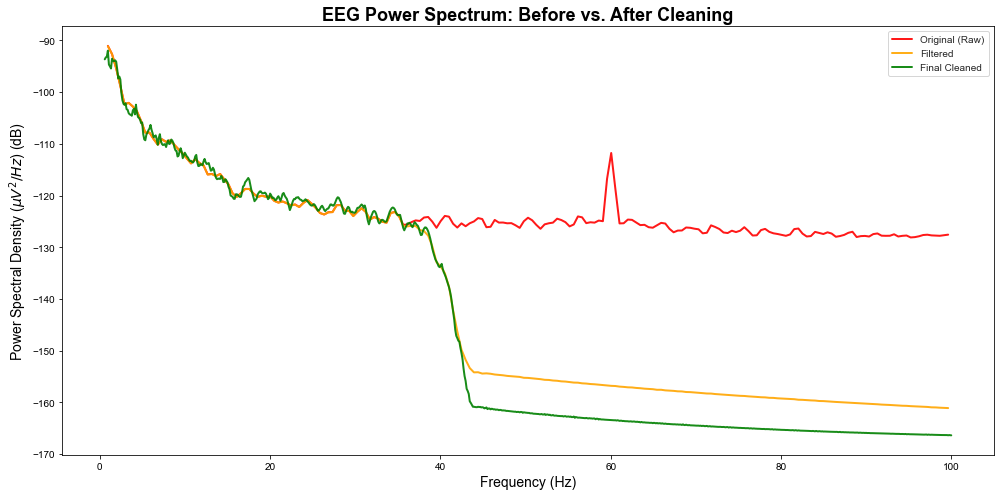


--- Generating Signal Trace Comparison Plot ---
This plot shows the original filtered signal vs. the final cleaned signal.
Searching for the largest EOG artifact to visualize...
Found largest artifact at 28382.80 seconds. Centering plot there.


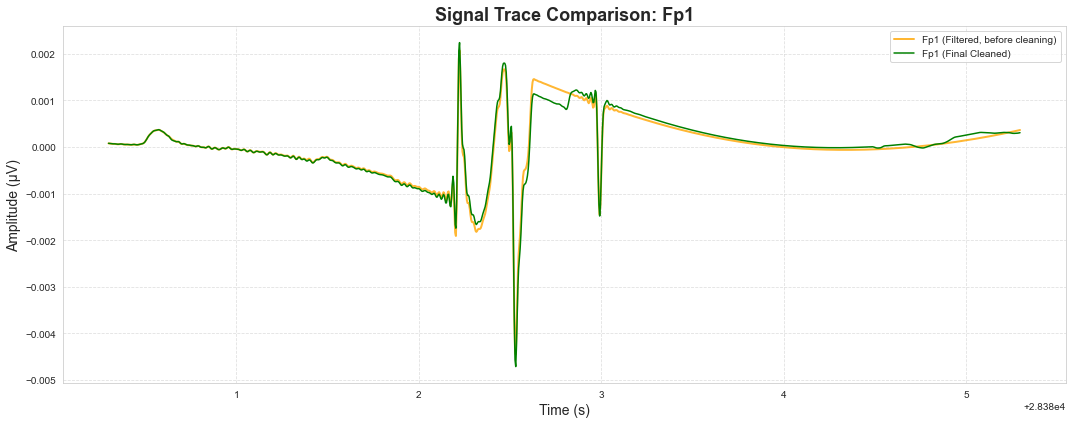


--- Visualization Complete ---
You now have a complete picture of the cleaning process.


In [2]:
import mne
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# =============================================================================
# --- Configuration ---
# =============================================================================
# The original, preprocessed file (before any cleaning)
ORIGINAL_FILE_PATH = 'EPCTL19_preproc.fif' 

# The final, cleaned file from our regression step.
CLEANED_FILE_PATH = 'EPCTL19_cleaned.fif'

# We will also load the filtered file to see an intermediate step
FILTERED_FILE_PATH = 'EPCTL19_filtered.fif'

# =============================================================================
# --- Main Execution ---
# =============================================================================
print("--- Step 5: The Final Verdict - Visualizing Cleaning Success ---")

# --- 1. Load all necessary files ---
print("Loading original, filtered, and cleaned data files...")
try:
    raw_original = mne.io.read_raw_fif(ORIGINAL_FILE_PATH, preload=True, verbose=False)
    raw_filtered = mne.io.read_raw_fif(FILTERED_FILE_PATH, preload=True, verbose=False)
    raw_cleaned = mne.io.read_raw_fif(CLEANED_FILE_PATH, preload=True, verbose=False)
    print("All files loaded successfully.")
except FileNotFoundError as e:
    print(f"ERROR: Could not find a required file. {e}")
    # Corrected the error message to be more generic
    print("Please ensure the 'preproc', 'filtered', and 'cleaned' .fif files for your subject are all present.")
    # Exit if files are not found
    exit()


# --- 2. PSD Comparison Plot ---
# This plot shows how the frequency content of the EEG has changed.
print("\n--- Generating PSD Comparison Plot ---")
fig, ax = plt.subplots(figsize=(14, 7))
sns.set_style("whitegrid")

# We create a dictionary to hold our data and plotting properties.
psd_data_to_plot = {
    'Original (Raw)': {'raw': raw_original, 'color': 'red'},
    'Filtered': {'raw': raw_filtered, 'color': 'orange'},
    'Final Cleaned': {'raw': raw_cleaned, 'color': 'green'}
}

for label, data in psd_data_to_plot.items():
    # Compute the PSD for the current raw object
    spectrum = data['raw'].compute_psd(picks='eeg', fmin=0.5, fmax=100.0)
    psds, freqs = spectrum.get_data(return_freqs=True)
    psds_db = 10 * np.log10(psds)
    mean_psd = np.mean(psds_db, axis=0)
    
    # Plot the result using the basic matplotlib function
    ax.plot(freqs, mean_psd, color=data['color'], lw=2, alpha=0.9, label=label)


ax.set_title("EEG Power Spectrum: Before vs. After Cleaning", fontsize=18, weight='bold')
ax.set_ylabel(r'Power Spectral Density ($\mu V^2/Hz$) (dB)', fontsize=14)
ax.set_xlabel("Frequency (Hz)", fontsize=14)
ax.legend()
plt.tight_layout()
plt.show()


# --- 3. Signal Trace Comparison Plot ---
# This plot shows the actual signal traces to see artifact removal in action.
print("\n--- Generating Signal Trace Comparison Plot ---")
print("This plot shows the original filtered signal vs. the final cleaned signal.")

# We will plot a specific EEG channel known to be affected by eye blinks, like Fp1.
channel_to_plot = 'Fp1'

# **THE FIX:** Automatically find the biggest EOG artifact in a robust way.
print("Searching for the largest EOG artifact to visualize...")
eog_data = raw_filtered.get_data(picks='eog')

# First, average the absolute signal of the EOG channels to get a single
# measure of eye movement activity.
mean_abs_eog = np.mean(np.abs(eog_data), axis=0)
# Now, find the index of the maximum value in this 1D array.
max_eog_idx = np.argmax(mean_abs_eog)

# This index is now guaranteed to be valid for the .times array.
max_eog_time = raw_filtered.times[max_eog_idx]
print(f"Found largest artifact at {max_eog_time:.2f} seconds. Centering plot there.")

# Define a 5-second window around this artifact
window = 5  # seconds
start_time = max_eog_time - window / 2
stop_time = max_eog_time + window / 2


# Get the data for the chosen channel from both files
# Ensure the sampling frequency is the same for comparison
sfreq = raw_cleaned.info['sfreq']
if raw_filtered.info['sfreq'] != sfreq:
    raw_filtered.resample(sfreq, verbose=False) # Match sfreq just in case

# Explicitly convert the start and stop times to integers.
start_index = int(raw_filtered.time_as_index(start_time)[0])
stop_index = int(raw_filtered.time_as_index(stop_time)[0])

filtered_segment, times = raw_filtered.get_data(
    picks=channel_to_plot, start=start_index, 
    stop=stop_index, return_times=True
)
cleaned_segment = raw_cleaned.get_data(
    picks=channel_to_plot, start=start_index, 
    stop=stop_index
)

# Create the plot
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(times, filtered_segment.T, color='orange', lw=2, alpha=0.8, label=f'{channel_to_plot} (Filtered, before cleaning)')
ax.plot(times, cleaned_segment.T, color='green', lw=1.5, alpha=1.0, label=f'{channel_to_plot} (Final Cleaned)')

ax.set_title(f"Signal Trace Comparison: {channel_to_plot}", fontsize=18, weight='bold')
ax.set_xlabel("Time (s)", fontsize=14)
ax.set_ylabel("Amplitude (µV)", fontsize=14)
ax.legend(loc='upper right')
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("\n--- Visualization Complete ---")
print("You now have a complete picture of the cleaning process.")

In [3]:
import mne
import numpy as np
import pandas as pd
import antropy as ant
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
import seaborn as sns

# =============================================================================
# --- Configuration ---
# =============================================================================
CLEANED_FILE_PATH = 'EPCTL19_cleaned.fif'
LABELS_FILE_PATH = './EPCTL19/EPCTL19.txt'
FEATURES_CSV_PATH = 'EPCTL19_features_channelwise.csv' # New output file name

SUBJECT_ID = 'EPCTL19'
EPOCH_DURATION = 30  # seconds

EEG_BANDS = {
    'delta': [0.5, 4],
    'theta': [4, 8],
    'alpha': [8, 12],
    'sigma': [12, 15],
    'beta': [15, 30]
}

# =============================================================================
# --- Main Feature Extraction Engine ---
# =============================================================================
print("--- Step 6: State-of-the-Art Feature Extraction (Channel-Wise) ---")

# --- 1. Load Data and Labels ---
raw = mne.io.read_raw_fif(CLEANED_FILE_PATH, preload=True, verbose=False)
annotations_df = pd.read_csv(LABELS_FILE_PATH, sep='\t', header=None, names=['stage', 'onset', 'duration'])
stage_mapping = {'L': 'Wake', 'W': 'Wake', 'N1': 'N1', 'N2': 'N2', 'N3': 'N3', 'R': 'REM'}
annotations_df['stage'] = annotations_df['stage'].map(stage_mapping)
annotations = mne.Annotations(
    onset=annotations_df['onset'],
    duration=annotations_df['duration'],
    description=annotations_df['stage']
)
raw.set_annotations(annotations)
print("Successfully loaded and set sleep stage annotations.")

# --- 2. Create Labeled Epochs (Corrected Method) ---
# Create a mapping from our stage names to integer event IDs
event_id = {'Wake': 0, 'N1': 1, 'N2': 2, 'N3': 3, 'REM': 4}

# Create an events array from the annotations in the Raw object.
events, event_id_map_from_annot = mne.events_from_annotations(
    raw, event_id=event_id, chunk_duration=EPOCH_DURATION, verbose=False
)

# Now, create the Epochs object centered around these events.
epochs = mne.Epochs(
    raw, events, event_id=event_id, tmin=0, tmax=EPOCH_DURATION, 
    preload=True, baseline=None, verbose=False
)

# Get the sleep stage labels for each created epoch.
y_events = epochs.events[:, 2]
# Create a reverse mapping from integer ID back to stage name
id_event_map = {v: k for k, v in event_id.items()}
y_labels = [id_event_map[label] for label in y_events]
print(f"Created {len(epochs)} labeled {EPOCH_DURATION}s epochs correctly.")


# --- 3. The Channel-Wise Feature Calculation Loop ---
all_features = []
sfreq = raw.info['sfreq']

# Get channel names once before the loop
eeg_info = mne.pick_info(epochs.info, mne.pick_types(epochs.info, eeg=True))
eeg_ch_names = eeg_info['ch_names']
eog_ch_names = mne.pick_info(epochs.info, mne.pick_types(epochs.info, eog=True))['ch_names']
emg_ch_names = mne.pick_info(epochs.info, mne.pick_types(epochs.info, emg=True))['ch_names']


print("Starting channel-wise feature calculation for each epoch...")
for i, epoch_data in enumerate(epochs.get_data()):
    epoch_features = {}
    
    # --- EEG Features (Channel-Wise) ---
    for ch_idx, ch_name in enumerate(eeg_ch_names):
        eeg_signal = epoch_data[eeg_ch_names.index(ch_name), :]
        
        # Calculate spectral power features for this channel
        psds, freqs = mne.time_frequency.psd_array_welch(
            eeg_signal, sfreq=sfreq, fmin=0.5, fmax=30.0, n_fft=int(sfreq * 2), verbose=False
        )
        total_power = np.sum(psds)
        
        for band, (fmin, fmax) in EEG_BANDS.items():
            band_power = np.sum(psds[(freqs >= fmin) & (freqs < fmax)])
            # Create a unique column name for each channel and feature
            epoch_features[f'{ch_name}_rel_power_{band}'] = band_power / total_power if total_power > 0 else 0
            
        # Calculate advanced features for this channel
        epoch_features[f'{ch_name}_spectral_entropy'] = ant.spectral_entropy(eeg_signal, sf=sfreq, method='welch', normalize=True)
        mobility, complexity = ant.hjorth_params(eeg_signal)
        epoch_features[f'{ch_name}_hjorth_mobility'] = mobility
        epoch_features[f'{ch_name}_hjorth_complexity'] = complexity

    # --- EOG & EMG Features (Averaged, as is standard) ---
    eog_data = epoch_data[mne.pick_types(epochs.info, eog=True), :]
    epoch_features['eog_std'] = np.mean(np.std(eog_data, axis=1))
    epoch_features['eog_kurtosis'] = np.mean(kurtosis(eog_data, axis=1))

    emg_data = epoch_data[mne.pick_types(epochs.info, emg=True), :].flatten()
    epoch_features['emg_rms'] = np.sqrt(np.mean(emg_data**2))
    
    all_features.append(epoch_features)

print("Feature calculation complete.")

# --- 4. Assemble and Save the Final DataFrame ---
features_df = pd.DataFrame(all_features)
features_df['subject_id'] = SUBJECT_ID
features_df['sleep_stage'] = y_labels

# **NEW:** Create the binary REM vs Non-REM column as requested.
# We map 'REM' to 1 and all other stages to 0.
features_df['is_rem'] = (features_df['sleep_stage'] == 'REM').astype(int)

# Reorder columns to have the identifiers and labels first.
# **EDIT:** Removed 'epoch_id' from this list.
id_cols = ['subject_id', 'sleep_stage', 'is_rem']
data_cols = sorted([col for col in features_df.columns if col not in id_cols]) # Sort for consistency
features_df = features_df[id_cols + data_cols]

print(f"\nSaving final channel-wise feature set to: {FEATURES_CSV_PATH}")
features_df.to_csv(FEATURES_CSV_PATH, index=False)
print("File saved successfully.")

print("\n--- Feature Extraction Complete ---")
print(f"Your final dataset has {len(features_df.columns)} columns (features).")
print("Here is a preview of your final, powerful dataset:")
# Show a transposed view because the table is very wide
print(features_df.head().T)



--- Step 6: State-of-the-Art Feature Extraction (Channel-Wise) ---


C:\Users\reddy\AppData\Local\Temp\ipykernel_26512\3082322816.py:33: RuntimeWarning: This filename (EPCTL19_cleaned.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(CLEANED_FILE_PATH, preload=True, verbose=False)
C:\Users\reddy\AppData\Local\Temp\ipykernel_26512\3082322816.py:42: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)


Successfully loaded and set sleep stage annotations.
Created 960 labeled 30s epochs correctly.
Starting channel-wise feature calculation for each epoch...
Feature calculation complete.

Saving final channel-wise feature set to: EPCTL19_features_channelwise.csv
File saved successfully.

--- Feature Extraction Complete ---
Your final dataset has 102 columns (features).
Here is a preview of your final, powerful dataset:
                              0          1          2          3          4
subject_id              EPCTL19    EPCTL19    EPCTL19    EPCTL19    EPCTL19
sleep_stage                Wake       Wake       Wake       Wake       Wake
is_rem                        0          0          0          0          0
C3_hjorth_complexity   1.969372   3.453174   3.845856   1.666811   2.788153
C3_hjorth_mobility     0.302571   0.187823   0.174952    0.35837   0.224422
...                         ...        ...        ...        ...        ...
T6_rel_power_theta     0.041635   0.027055   0.